<a href="https://colab.research.google.com/github/rmnmndz11/Ejercicios_clase/blob/main/Inventario_con_simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%pip install simpy #Se instala la librería Simpy
import simpy #Se importan las librerías necesarias para la simulación
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.16 sold 2
0.53 sold 4
0.69 sold 2
0.88 sold 3
1.00 sold 3
1.01 sold 1
1.11 sold 3
1.44 sold 3
1.44 placed order for 21
1.61 sold 2
1.61 placed order for 23
1.97 sold 1
1.97 placed order for 24
1.99 sold 4
1.99 placed order for 28
2.08 sold 0 (out of stock)
2.08 placed order for 30
2.38 sold 0 (out of stock)
2.38 placed order for 30
2.79 sold 0 (out of stock)
2.79 placed order for 30
3.11 sold 0 (out of stock)
3.11 placed order for 30
3.26 sold 0 (out of stock)
3.26 placed order for 30
3.28 sold 0 (out of stock)
3.28 placed order for 30
3.44 placed order, 30 in inventory
3.46 sold 2
3.61 placed order, 28 in inventory
3.97 placed order, 28 in inventory
3.99 placed order, 28 in inventory
4.04 sold 4
4.06 sold 4
4.08 placed order, 20 in inventory
4.12 sold 4
4.38 placed order, 16 in inventory
4.39 sold 1
4.56 sold 1
4.63 sold 2
4.79 placed order, 12 in inventory
4.82 sold 1
4.92 sold 1


Text(0, 0.5, 'Inventory level')

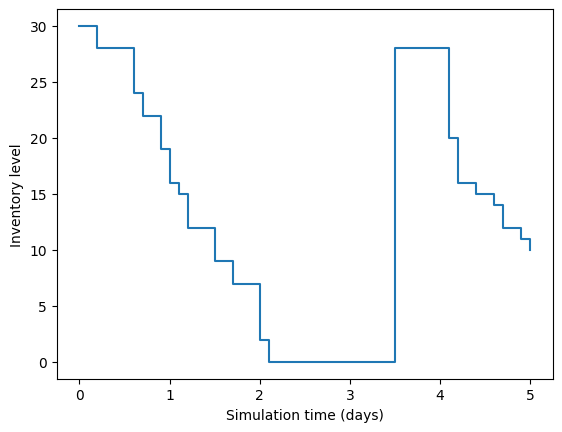

In [15]:
def warehouse_run(env, order_cutoff, order_target): #Se define una función "warehouse_run" que simula el funcionamiento del almacén.
  global inventory, balance, num_order #Se inicializan las variables globales que rastrearan el inventario, el balance y el número de órdenes realizadas en el almacén.

  inventory = order_target
  balance = 0.0
  num_ordered = 0

  while True: #En este bucle infinito, se genera un tiempo de interarribo utilizando la función generate_interarrival()
    interarrival = generate_interarrival()
    yield env.timeout(interarrival) #Se espera el tiempo de llegada utilizando yield env.timeout(interarrival)
    balance -= inventory*2*interarrival #Se calcula el costo de mantener el inventario
    demand = generate_demand() #Se genera la demanda
    if demand < inventory: #Si la demanda es menor que el inventario actual, se venden los productos, se actualiza el balance y se reduce el inventario.
      balance += 100*demand
      inventory -= demand
      print ('{:.2f} sold {}'.format(env.now, demand)) #Se imprime un mensaje indicando la cantidad vendida.
    else: #Si la demanda es igual o mayor que el inventario actual, se venden todos los productos en el inventario, se actualiza el balance y se establece el inventario en cero.
        balance += 100*inventory
        inventory = 0
        print ('{:.2f} sold {} (out of stock)'.format(env.now, inventory)) #Se imprime un mensaje indicando que no hay suficiente inventario.
    if inventory < order_cutoff and num_ordered == 0: #Si el inventario es menor que "order_cutoff" y no se ha realizado ningún pedido, se inicia un proceso para manejar un pedido llamando a la función handle_order().
      env.process(handle_order(env, order_target))

def handle_order(env, order_target): #Esta función maneja el proceso de realizar un pedido
  global inventory, balance, num_ordered

  num_ordered = order_target - inventory #Se calcula la cantidad de productos a pedir restando el inventario deseado al inventario actual
  print ('{:.2f} placed order for {}'.format(env.now, num_ordered)) #Se imprime un mensaje indicando la cantidad de productos pedidos.
  balance -= 50*num_ordered #Se actualiza el balance restando el costo de realizar el pedido
  yield env.timeout(2.0) #Se espera un tiempo de 2 unidades para simular el tiempo de entrega del pedido.
  inventory += num_ordered #Se incrementa el inventario en la cantidad pedida
  num_ordered = 0
  print ('{:.2f} placed order, {} in inventory'.format(env.now, inventory)) #Se imprime un mensaje indicando la cantidad de productos en el inventario después de recibir el pedido.

def generate_interarrival(): # Esta función genera el tiempo entre llegadas de clientes utilizando una distribución exponencial.
  return np.random.exponential(1./5)

def generate_demand(): #Esta función genera la demanda de productos utilizando una distribución discreta (números enteros entre 1 y 4).
  return np.random.randint(1, 5)

obs_time = [] #Se almacenan los tiempos de observación
inventory_level = [] #Se almacenan los niveles de inventario.

def observe(env): #Se registran los tiempos de observación y los niveles de inventario en las listas obs_time y inventory_level, respectivamente.
  global inventory

  while True:
    obs_time.append(env.now)
    inventory_level.append(inventory)
    yield env.timeout(0.1) # Se espera un tiempo de 0.1 unidades en cada iteración.

np.random.seed(0) #Se establece la semilla del generador de números aleatorios para obtener resultados reproducibles.

env = simpy.Environment() #Se crea un entorno de simulación
env.process(warehouse_run(env, 10, 30)) # Se inicia el proceso warehouse_run(env, 10, 30) para simular el funcionamiento del almacén
env.process(observe(env)) #Observe(env) observar los niveles de inventario.

env.run(until=5.0) #Se ejecuta la simulación hasta que se alcance un tiempo de simulación de 5 unidades

plt.figure()
plt.step(obs_time, inventory_level, where='post') #Se traza un gráfico de escalones (step) con los tiempos de observación (obs_time) en el eje x y los niveles de inventario (inventory_level) en el eje y.
plt.xlabel('Simulation time (days)')
plt.ylabel('Inventory level')